# Projeto 1 - Gabriel Couto
Pergunta: Países com maior IDH realmente tem maiores taxas de suicídio tanto para homens quanto para mulheres?

## Introdução:
   É comum acreditarem que países com maiores IDH's tenham menores taxa de suicídio (pessoas que se suicidam a cada 100 mil pessoas) <br>
    Utilizando como minhas variáveis os dados disponíveis no Gapminder de IDH, TS masculina e TS feminina analizo a questão

Importar bibliotecas e arquivos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

idh0 = pd.read_excel('dados/Indicator_HDI.xlsx')
h0 = pd.read_excel('dados/Suicide male indicator.xlsx')
m0 = pd.read_excel('dados/Suicide female indicator.xlsx')

Definindo funções para manipular as tabelas e plotar os gráficos com mais facilidade:

In [11]:
def tabelaAno(ano): 
    #Pegar colunas da variável escolhida e do ano
    m1 = m0.loc[:,['Suicide women age adjusted',ano]]
    h1 = h0.loc[:,['Suicide among men, per 100 000, age adjusted',ano]]
    idh1 = idh0.loc[:,['HDI',ano]]

    #Mudar nome das colunas
    m1.columns = ['Country','TSF_'+str(ano)]
    h1.columns = ['Country','TSM_'+str(ano)]
    idh1.columns = ['Country','IDH_'+str(ano)]

    #Mudar índice para o país
    m2 = m1.set_index('Country')
    h2 = h1.set_index('Country')
    idh2 = idh1.set_index('Country') 
    
    #Filtrar Nan's
    m3 = m2[m2['TSF_'+str(ano)]>-1]
    h3 = h2[h2['TSM_'+str(ano)]>-1]     
    idh3 = idh2[idh2['IDH_'+str(ano)]>-1]

    #Unir as tabelas
    dados = idh3.join(h3.join(m3,how='inner'), how='inner')
    
    #Salvar tabela
    dados.to_csv('dados/IDHxTSMxTSF_'+str(ano)+'.csv')
    return dados

def plotar(ano,X):
    if X == 'log':
        tabelaAno(ano).plot.scatter(x="IDH_"+str(ano), y = "TSF_"+str(ano),  logx=True)
        tabelaAno(ano).plot.scatter(x="IDH_"+str(ano), y = "TSM_"+str(ano),  logx=True)
    else:
        tabelaAno(ano).plot.scatter(x="IDH_"+str(ano), y = "TSF_"+str(ano))
        tabelaAno(ano).plot.scatter(x="IDH_"+str(ano), y = "TSM_"+str(ano))

## Análise exploratória:
Primeiramente visualizamos nossos dados plotando os gráficos de dispersão de IDH x TSM e IDH x TSF no ano escolhido (2000) para ver como os dados se distribuem:

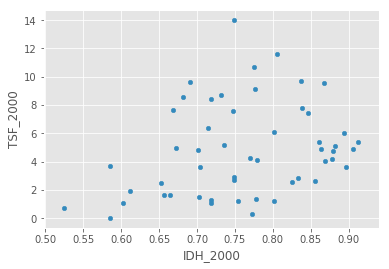

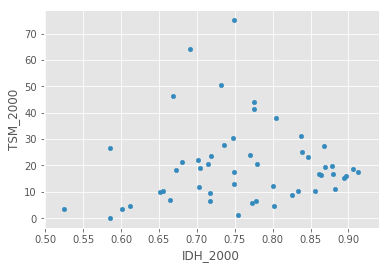

In [16]:
plotar(2000,0)

Gerando estatísticas dos dados:

In [53]:
stat = tabelaAno(2000).describe()
stat

,IDH_2000,TSM_2000,TSF_2000
count,52.000000,52.000000,52.000000
mean,0.761481,20.106163,4.870909
std,0.094416,15.307430,3.262774
min,0.525000,0.118078,0.039894
25%,0.702500,10.071437,2.359902
50%,0.762000,17.504965,4.503623
75%,0.840750,24.351253,7.504652
max,0.913000,75.079410,13.985880


In [56]:
print('Taxa de suicídio feminino varia de',round(stat['TSF_2000']['min'],2),'à',round(stat['TSF_2000']['max'],2))
print('Taxa de suicídio masculino varia de',round(stat['TSM_2000']['min'],2),'à',round(stat['TSM_2000']['max'],2))

Taxa de suicídio feminino varia de 0.04 à 13.99
Taxa de suicídio masculino varia de 0.12 à 75.08


Calculando o coeficiente de correlação entre as variáveis:

In [3]:
tabelaAno(2000).corr()

,IDH_2000,TSM_2000,TSF_2000
IDH_2000,1.000000,0.065183,0.270789
TSM_2000,0.065183,1.000000,0.864259
TSF_2000,0.270789,0.864259,1.000000


O coef. de correlação entre IDH e Sui.Fem (0.27) sugere uma baixa correlação entre essas duas variáveis.<br>
O coef. de correlação entre IDH e Sui.Mas (0.065) sugere uma ausência de relação entre as duas variáveis.<br> 

Aparentemente não existe correlação entre IDH e as TS para nenhum dos sexos, mas usamos os outros anos disponíveis para confirmar nossa análise:

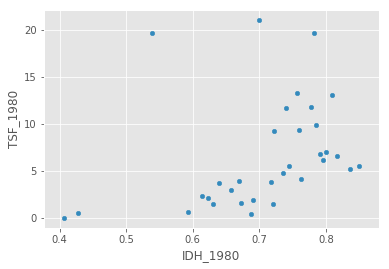

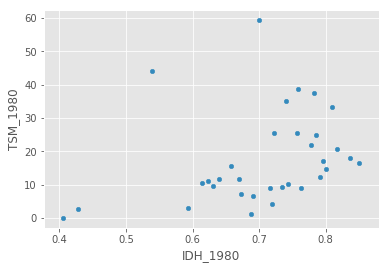

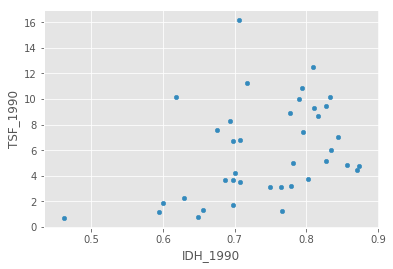

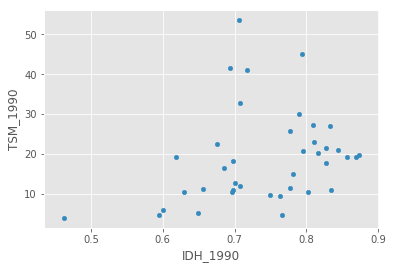

In [65]:
plotar(1980,0)
plotar(1990,0)

Calculando o coef. de correlação para anos disponíveis:

In [67]:
tsm2000,tsf2000 = tabelaAno(2000).corr().loc['IDH_2000',['TSM_2000','TSF_2000']]
tsm1990,tsf1990 = tabelaAno(1990).corr().loc['IDH_1990',['TSM_1990','TSF_1990']]
tsm1980,tsf1980 = tabelaAno(1980).corr().loc['IDH_1980',['TSM_1980','TSF_1980']]

#Criar tabela de correlação entre TSF e TSM com IDH nos 3 anos disponíveis
correlacoes = pd.DataFrame({'IDH_1980':[tsm1980,tsf1980],'IDH_1990':[tsm1990,tsf1990],'IDH_2000':[tsm2000,tsf2000]}).T
correlacoes.columns=['TSM','TSF']
correlacoes

,TSM,TSF
IDH_1980,0.307300,0.331185
IDH_1990,0.275305,0.363619
IDH_2000,0.065183,0.270789


## Conclusão:
Portando, não existe correlação entre a taxa de homícidio masculino e IDH e nem entre a taxa de homicídio feminino e o IDH.<br>
Além disso pode-se concluir com base nos dados que a TSM em geral é bem maior que a TSF.

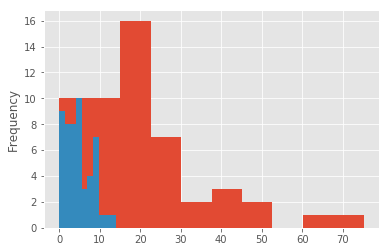

In [40]:
tabelaAno(2000)["TSM_2000"].plot.hist()
tabelaAno(2000)["TSF_2000"].plot.hist()

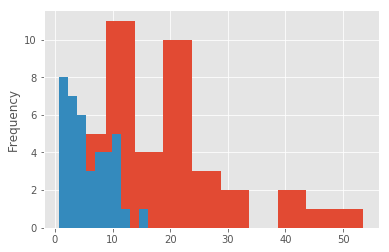

In [70]:
tabelaAno(1990)["TSM_1990"].plot.hist()
tabelaAno(1990)["TSF_1990"].plot.hist()

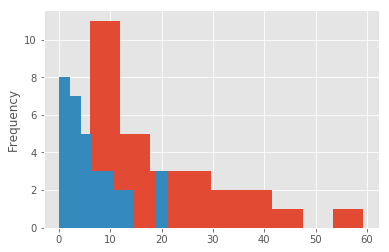

In [71]:
tabelaAno(1980)["TSM_1980"].plot.hist()
tabelaAno(1980)["TSF_1980"].plot.hist()